In [4]:
import pandas as pd

xls_1 = pd.ExcelFile('Unemployment in India.xlsx')
xls_2 = pd.ExcelFile('Unemployment_Rate_upto_11_2020.xlsx')

sheet_1 = xls_1.sheet_names
sheet_2 = xls_2.sheet_names

sheet_1, sheet_2

(['Unemployment in India'], ['Unemployment_Rate_upto_11_2020'])

In [5]:
sheet_1

['Unemployment in India']

In [6]:
sheet_2

['Unemployment_Rate_upto_11_2020']

In [7]:
# Load the sheets into DataFrames
df_india = pd.read_excel('Unemployment in India.xlsx', sheet_name='Unemployment in India')
df_rate = pd.read_excel('Unemployment_Rate_upto_11_2020.xlsx', sheet_name='Unemployment_Rate_upto_11_2020')

# Display the first few rows of each DataFrame
df_india_head = df_india.head()
df_rate_head = df_rate.head()

df_india_head, df_rate_head

(           Region        Date Frequency  Estimated Unemployment Rate (%)  \
 0  Andhra Pradesh  31-05-2019   Monthly                             3.65   
 1  Andhra Pradesh  30-06-2019   Monthly                             3.05   
 2  Andhra Pradesh  31-07-2019   Monthly                             3.75   
 3  Andhra Pradesh  31-08-2019   Monthly                             3.32   
 4  Andhra Pradesh  30-09-2019   Monthly                             5.17   
 
    Estimated Employed  Estimated Labour Participation Rate (%)   Area  
 0          11999139.0                                    43.24  Rural  
 1          11755881.0                                    42.05  Rural  
 2          12086707.0                                    43.50  Rural  
 3          12285693.0                                    43.97  Rural  
 4          12256762.0                                    44.68  Rural  ,
            Region        Date Frequency  Estimated Unemployment Rate (%)  \
 0  Andhra Pradesh  

In [8]:
# Convert 'Date' columns to datetime format
df_india['Date'] = pd.to_datetime(df_india['Date'], format='%d-%m-%Y')
df_rate['Date'] = pd.to_datetime(df_rate['Date'], format='%d-%m-%Y')

# Check for missing values
missing_values_india = df_india.isnull().sum()
missing_values_rate = df_rate.isnull().sum()

# Display the summary of missing values
missing_values_india, missing_values_rate

(Region                                     14
 Date                                       14
 Frequency                                  14
 Estimated Unemployment Rate (%)            14
 Estimated Employed                         14
 Estimated Labour Participation Rate (%)    14
 Area                                       14
 dtype: int64,
 Region                                     0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
 Region.1                                   0
 Longitude                                  0
 Latitude                                   0
 dtype: int64)

In [9]:
# Drop rows with missing values in the 'Unemployment in India' DataFrame
df_india_cleaned = df_india.dropna()

# Ensure consistency in column names by making all column names lowercase and replacing spaces with underscores
df_india_cleaned.columns = df_india_cleaned.columns.str.lower().str.replace(' ', '_')
df_rate.columns = df_rate.columns.str.lower().str.replace(' ', '_')

# Display the cleaned data to verify
df_india_cleaned_head = df_india_cleaned.head()
df_rate_head_cleaned = df_rate.head()

df_india_cleaned_head, df_rate_head_cleaned

(           region       date frequency  estimated_unemployment_rate_(%)  \
 0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
 1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
 2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
 3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
 4  Andhra Pradesh 2019-09-30   Monthly                             5.17   
 
    estimated_employed  estimated_labour_participation_rate_(%)   area  
 0          11999139.0                                    43.24  Rural  
 1          11755881.0                                    42.05  Rural  
 2          12086707.0                                    43.50  Rural  
 3          12285693.0                                    43.97  Rural  
 4          12256762.0                                    44.68  Rural  ,
            region       date frequency  estimated_unemployment_rate_(%)  \
 0  Andhra Pradesh 2020-01-

In [20]:
print(df_rate['date'].head(10))


0   2020-01-31
1   2020-02-29
2   2020-03-31
3   2020-04-30
4   2020-05-31
5   2020-06-30
6   2020-07-31
7   2020-08-31
8   2020-09-30
9   2020-10-31
Name: date, dtype: datetime64[ns]


In [21]:
df_rate['date'] = pd.to_datetime(df_rate['date'], errors='coerce')


In [22]:
# Identify rows with NaT values in the date column
conversion_errors = df_rate[df_rate['date'].isna()]
print(conversion_errors)

# Optionally, drop rows with NaT values in the date column
df_rate = df_rate.dropna(subset=['date'])


Empty DataFrame
Columns: [region, date, frequency, estimated_unemployment_rate_(%), estimated_employed, estimated_labour_participation_rate_(%), region.1, longitude, latitude]
Index: []


In [23]:
import pandas as pd
print(df_rate['date'].head(10))
df_rate['date'] = pd.to_datetime(df_rate['date'], errors='coerce')
conversion_errors = df_rate[df_rate['date'].isna()]
print(conversion_errors)

df_rate = df_rate.dropna(subset=['date'])

print(df_rate.head(10))

0   2020-01-31
1   2020-02-29
2   2020-03-31
3   2020-04-30
4   2020-05-31
5   2020-06-30
6   2020-07-31
7   2020-08-31
8   2020-09-30
9   2020-10-31
Name: date, dtype: datetime64[ns]
Empty DataFrame
Columns: [region, date, frequency, estimated_unemployment_rate_(%), estimated_employed, estimated_labour_participation_rate_(%), region.1, longitude, latitude]
Index: []
           region       date frequency  estimated_unemployment_rate_(%)  \
0  Andhra Pradesh 2020-01-31         M                             5.48   
1  Andhra Pradesh 2020-02-29         M                             5.83   
2  Andhra Pradesh 2020-03-31         M                             5.79   
3  Andhra Pradesh 2020-04-30         M                            20.51   
4  Andhra Pradesh 2020-05-31         M                            17.43   
5  Andhra Pradesh 2020-06-30         M                             3.31   
6  Andhra Pradesh 2020-07-31         M                             8.34   
7  Andhra Pradesh 2020-08-31  

In [26]:
df_india['Date'] = pd.to_datetime(df_india['Date'], format='%d-%m-%Y')
df_rate['date'] = pd.to_datetime(df_rate['date'], errors='coerce')

In [28]:
df_india_cleaned = df_india.dropna()
df_rate_cleaned = df_rate.dropna(subset=['date'])  # Only drop rows where Date conversion failed

In [29]:
df_india_cleaned.columns = df_india_cleaned.columns.str.lower().str.replace(' ', '_')
df_rate_cleaned.columns = df_rate_cleaned.columns.str.lower().str.replace(' ', '_')


In [30]:
print(df_india_cleaned.describe())
print(df_rate_cleaned.describe())


                                date  estimated_unemployment_rate_(%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       estimated_employed  estimated_labour_participation_rate_(%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                                38.062500

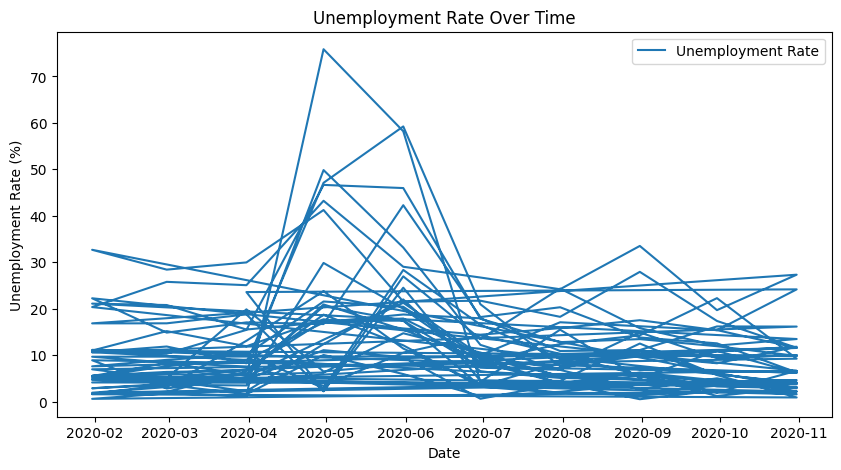

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_rate_cleaned['date'], df_rate_cleaned['estimated_unemployment_rate_(%)'], label='Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.legend()
plt.show()


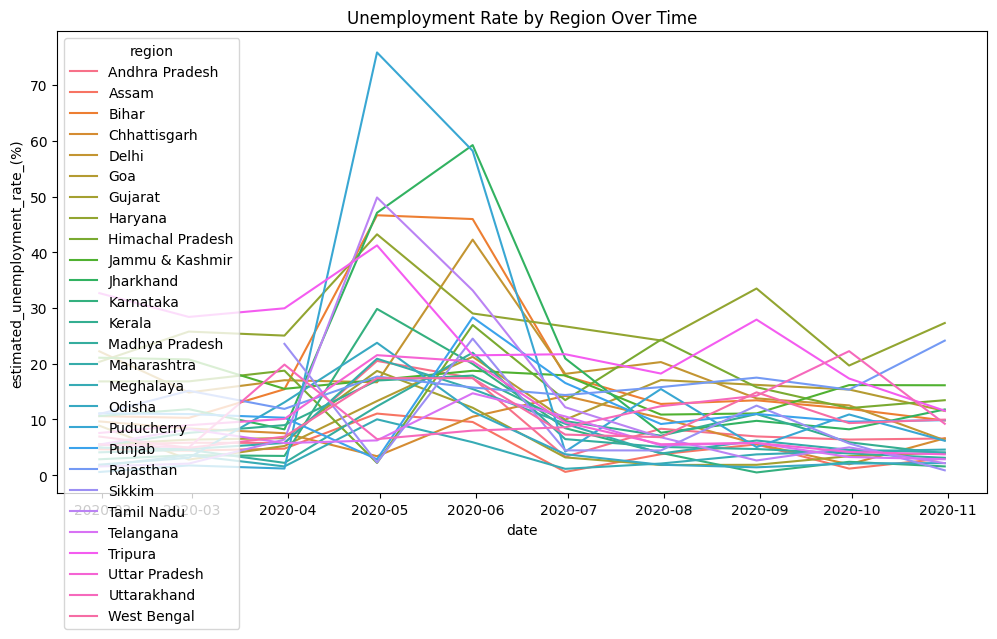

In [32]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rate_cleaned, x='date', y='estimated_unemployment_rate_(%)', hue='region')
plt.title('Unemployment Rate by Region Over Time')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10152\3226254265.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_rate['Date'] = pd.to_datetime(df_rate['Date'], errors='coerce')


                                date  estimated_unemployment_rate_(%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       estimated_employed  estimated_labour_participation_rate_(%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                                38.062500

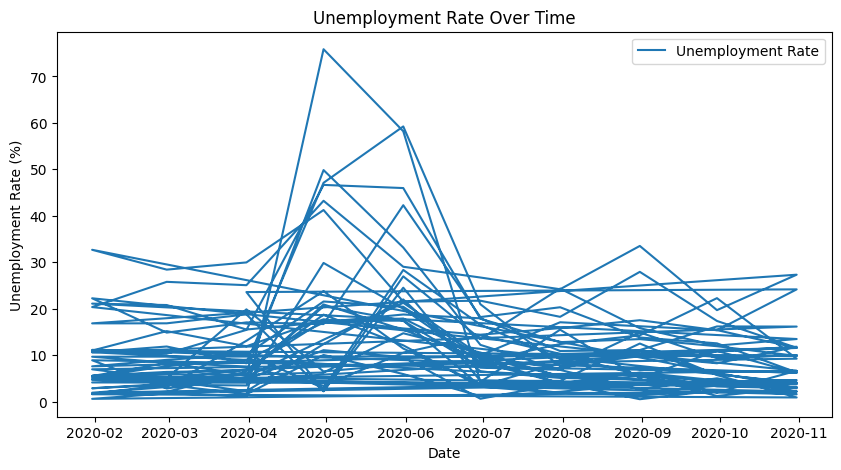

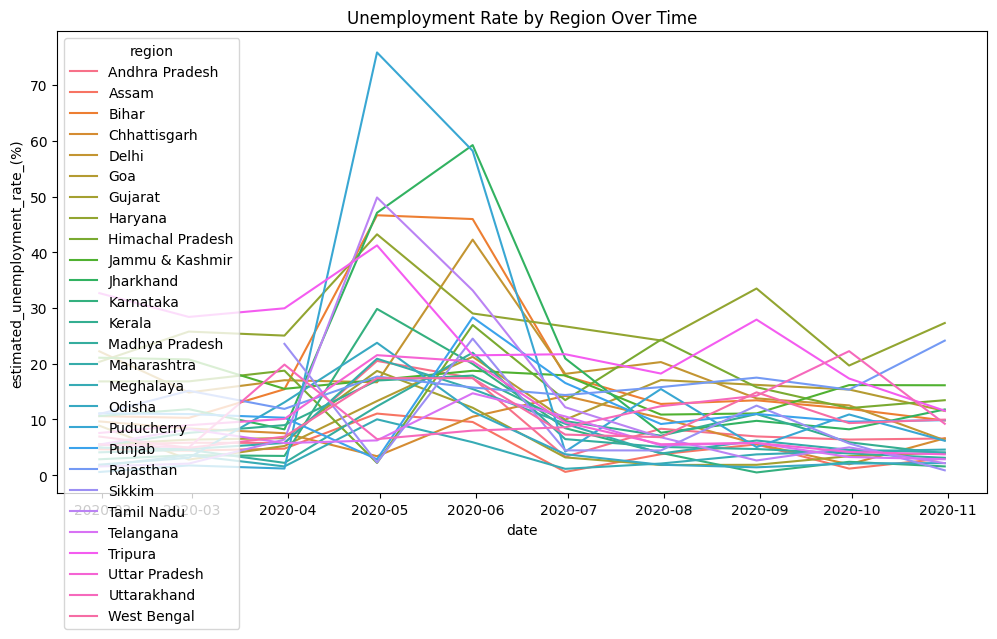

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df_india = pd.read_excel('Unemployment in India.xlsx', sheet_name='Unemployment in India')
df_rate = pd.read_excel('Unemployment_Rate_upto_11_2020.xlsx', sheet_name='Unemployment_Rate_upto_11_2020')

# Preprocess the data
df_india['Date'] = pd.to_datetime(df_india['Date'], format='%d-%m-%Y')
df_rate['Date'] = pd.to_datetime(df_rate['Date'], errors='coerce')

df_india_cleaned = df_india.dropna()
df_rate_cleaned = df_rate.dropna(subset=['Date'])

df_india_cleaned.columns = df_india_cleaned.columns.str.lower().str.replace(' ', '_')
df_rate_cleaned.columns = df_rate_cleaned.columns.str.lower().str.replace(' ', '_')

# Exploratory Data Analysis
print(df_india_cleaned.describe())
print(df_rate_cleaned.describe())

# Unemployment rate trends over time
plt.figure(figsize=(10, 5))
plt.plot(df_rate_cleaned['date'], df_rate_cleaned['estimated_unemployment_rate_(%)'], label='Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.legend()
plt.show()

# Region-wise unemployment rates
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rate_cleaned, x='date', y='estimated_unemployment_rate_(%)', hue='region')
plt.title('Unemployment Rate by Region Over Time')
plt.show()
